In [1]:
# import libraries
import pandas as pd
from src.utils import insights as IN
from src.utils import cleaning_data as CLD

In [2]:
# set option setting to display all columns
pd.set_option('display.max_columns', None)

In [3]:
# load data with cluster label column
data = pd.read_csv("../data/processed/data_scaled_minmax.csv")

In [4]:
# show clustes labels 
data['hierarchical_cluster'].unique()

array([2, 4, 3, 1], dtype=int64)

In [5]:
# filter the dataset with cluster label and create dataset for each cluster
cluster1 = data[data['hierarchical_cluster']==1]
cluster2 = data[data['hierarchical_cluster']==2]
cluster3 = data[data['hierarchical_cluster']==3]
cluster4 = data[data['hierarchical_cluster']==4]

In [6]:
# get features rely on its type
binary, numeric, labeled = CLD.get_features_based_type(data, data.drop(columns='hierarchical_cluster').columns)

Number of one-hot encoded features: 211
Samples of one-hot encoded features (sample size=5):


,made_trips,worker,license,missing_work_location,missing_school_location,bike_stolen,no_bike_nyc_bike_lanes,no_bike_nyc_paving,no_bike_nyc_storage,no_bike_nyc_long_trips,no_bike_nyc_showers,no_bike_nyc_modes,no_bike_nyc_unable,no_bike_nyc_other,bike_share_citi_bike,bike_share_jump,bike_share_lime,bike_share_none,bike_share_user,no_bike_share_unfamiliar,no_bike_share_expensive,no_bike_share_neighborhood,no_bike_share_stations,no_bike_share_personal_bike,no_bike_share_docks,no_bike_share_uncomfortable,no_bike_share_other,tnc_use_uber,tnc_use_lyft,tnc_use_via,tnc_use_juno,tnc_use_none,tnc_user,car_share_zipcar,car_share_car2go,car_share_enterprise,car_share_other,car_share_none,car_share_user,race_american_indian,race_asian,race_black,race_native_hawaiian,race_white,race_other,disability_hearing,disability_seeing,disability_walking,disability_mobility,disability_dressing,disability_concentrating,disability_none,license999,license995,license-9998,tnc_user999,tnc_user995,tnc_user-9998,tnc_use_999,tnc_use_995,tnc_use_-9998,bike_999,bike_995,bike_-9998,no_bike_nyc_999,no_bike_nyc_995,no_bike_nyc_-9998,bike_share_999,bike_share_995,bike_share_-9998,disability_999,disability_995,disability_-9998,race_999,race_995,race_-9998,no_bike_share_999,no_bike_share_995,no_bike_share_-9998,car_share_999,car_share_995,car_share_-9998,student_0,student_1,student_2,ethnicity_1,ethnicity_2,ethnicity_3,ethnicity_4,ethnicity_997,ethnicity_999,gender_1,gender_2,gender_4,gender_997,gender_999,tnc_purpose_1,tnc_purpose_2,tnc_purpose_3,tnc_purpose_4,tnc_purpose_5,tnc_purpose_7,tnc_purpose_50,tnc_purpose_51,tnc_purpose_60,tnc_purpose_99,tnc_purpose_995,smartphone_type_0,smartphone_type_1,smartphone_type_2,smartphone_type_3,packages_-9998,packages_1,packages_2,packages_3,packages_4,packages_5,packages_6,packages_7,packages_8,harassment_-9998,harassment_1,harassment_2,harassment_3,harassment_4,tnc_mode_1,tnc_mode_5,tnc_mode_100,tnc_mode_101,tnc_mode_102,tnc_mode_103,tnc_mode_104,tnc_mode_105,tnc_mode_106,tnc_mode_107,tnc_mode_995,employment_1,employment_2,employment_3,employment_6,employment_7,work_mode_1,work_mode_5,work_mode_100,work_mode_101,work_mode_102,work_mode_103,work_mode_104,work_mode_105,work_mode_106,work_mode_995,vehicle_1,vehicle_2,vehicle_3,vehicle_4,vehicle_5,vehicle_7,vehicle_18,vehicle_995,vehicle_996,vehicle_997,job_type_-9998,job_type_1,job_type_2,job_type_3,job_type_4,job_type_995,industry_-9998,industry_1,industry_2,industry_3,industry_4,industry_5,industry_6,industry_7,industry_8,industry_9,industry_10,industry_11,industry_12,industry_13,industry_14,industry_15,industry_16,industry_17,industry_18,industry_995,cms_zone_Inner Brooklyn,cms_zone_Inner Queens,cms_zone_Manhattan Core,cms_zone_Middle Queens,cms_zone_Northern Bronx,cms_zone_Northern Manhattan,cms_zone_Outer Brooklyn,cms_zone_Outer Queens,cms_zone_Southern Bronx,cms_zone_Staten Island,work_cms_zone_Inner Brooklyn,work_cms_zone_Inner Queens,work_cms_zone_JFK,work_cms_zone_LGA,work_cms_zone_Manhattan Core,work_cms_zone_Middle Queens,work_cms_zone_Northern Bronx,work_cms_zone_Outer Brooklyn,work_cms_zone_Outer Queens,work_cms_zone_Southern Bronx,work_cms_zone_Staten Island,work_cms_zone_Upper Manhattan,first_travel_date_month,last_travel_date_month
2111,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2417,1.0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,1,

Number of numeric features: 20
Samples of numeric features (sample size=5):


,jobs_count,english_proficiency,num_complete_weekdays,tnc_freq,num_taxi_trips,first_travel_date_day,drive_cbd_freq,planning_apps,num_trips,num_walk_trips,bike_freq,last_travel_date_day,num_transit_trips,telework_freq,age,num_tnc_trips,education,num_bike_trips,num_complete_weekend_days,congestion
756,0.166667,0.25,0.8,0.777778,0.0,0.133333,0.777778,0.500,0.146067,0.086022,0.833333,0.333333,0.122807,0.000000,0.285714,0.000000,0.888889,0.000000,1.0,0.8
151,0.166667,0.25,1.0,0.888889,0.0,0.000000,0.000000,0.125,0.443820,0.591398,0.833333,0.200000,0.456140,1.000000,0.142857,0.000000,0.888889,0.000000,1.0,0.2
2294,0.166667,0.25,1.0,0.000000,0.0,0.300000,1.000000,0.500,0.292135,0.010753,0.833333,0.500000,0.000000,1.000000,0.714286,0.000000,0.888889,0.000000,1.0,0.8
2126,0.166667,0.25,0.8,0.888889,0.0,0.766667,0.666667,0.125,0.168539,0.032258,0.833333,0.966667,0.017544,0.333333,0.142857,0.000000,1.000000,0.000000,1.0,0.8
714,0.166667,0.25,0.8,0.666667,0.0,0.500000,0.000000,0.125,0.191011,0.161290,0.500000,0.700000,0.210526,1.000000,0.142857,0.166667,1.000000,0.055556,1.0,0.2


Number of labeled features: 0


In [7]:
# all clusters in list 
clusters = [data, cluster1 ,cluster2, cluster3, cluster4]

In [8]:
# show size of clusters
print(f"The Number of all samples: {len(data)}")
for count,cluster in enumerate(clusters[1:]):
    print(f"The Number of samples in Cluster {count+1}: {len(cluster)}")

The Number of all samples: 3346
The Number of samples in Cluster 1: 385
The Number of samples in Cluster 2: 599
The Number of samples in Cluster 3: 771
The Number of samples in Cluster 4: 1591


### For Numeric Features

In [9]:
# calculate variance for each feature for all clusters
variences = IN.clusters_variances(clusters, numeric)

In [10]:
# show variance
variences

,all_data,cluster_1,cluster_2,cluster_3,cluster_4
num_taxi_trips,0.000327,0.000035,0.000004,0.001327,0.000035
num_bike_trips,0.003540,0.004089,0.002680,0.002157,0.004365
num_tnc_trips,0.004305,0.003924,0.000224,0.000774,0.007156
num_trips,0.015138,0.010719,0.009893,0.018918,0.013765
english_proficiency,0.015589,0.012966,0.022152,0.020360,0.011377
jobs_count,0.015843,0.000000,0.000000,0.011517,0.010357
num_walk_trips,0.016904,0.014101,0.011027,0.017235,0.017861
num_transit_trips,0.017997,0.010423,0.005871,0.022480,0.019255
age,0.055460,0.074562,0.066706,0.042282,0.030301
bike_freq,0.069659,0.052850,0.069257,0.090519,0.061766


#### Calculating variances and finding the low variances does not help to find the related feature for the cluster, beacuse maybe all clusters have low variances but the same distribution then the feature does not have meaning for specific cluster but have the same meaning for all clusters, and we want to find features which can interpret each cluster uniquely

#### So we decided to compare the distribution for each feature for all clusters and the all dataset

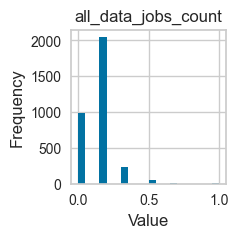

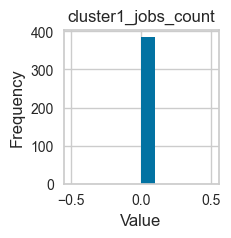

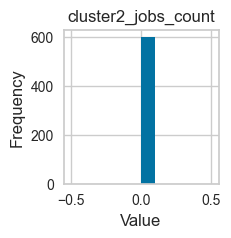

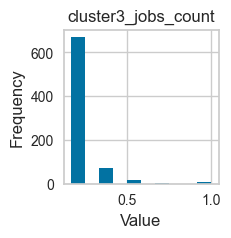

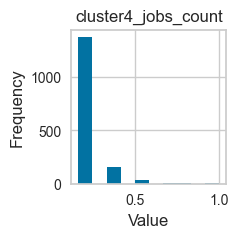

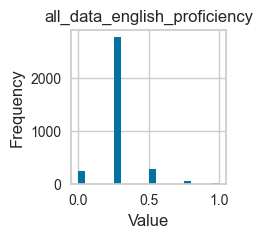

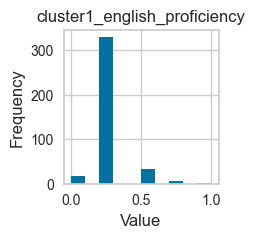

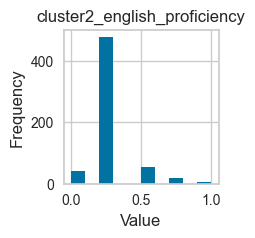

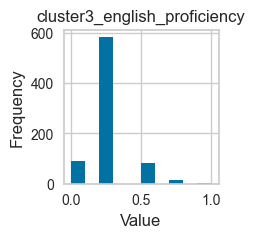

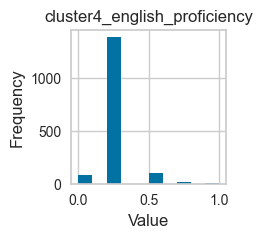

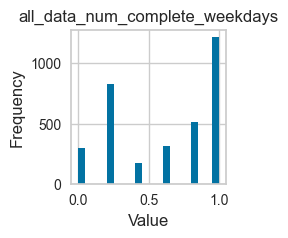

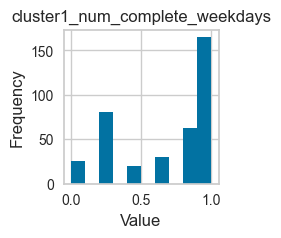

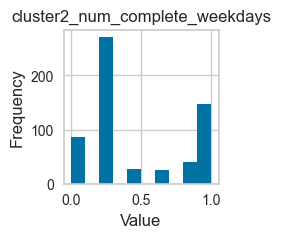

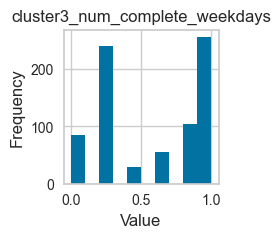

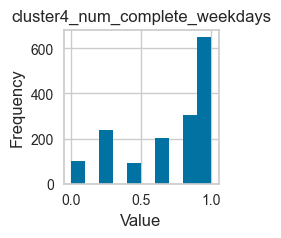

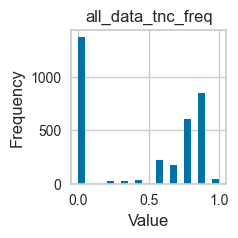

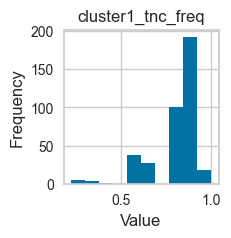

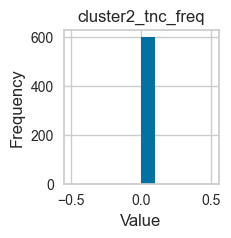

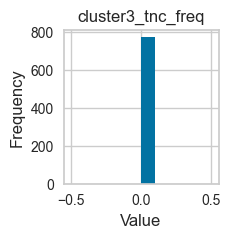

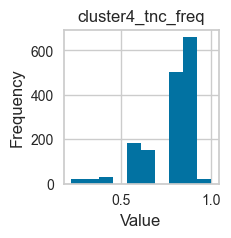

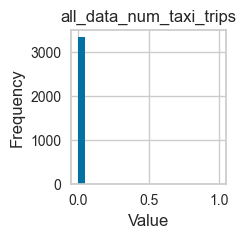

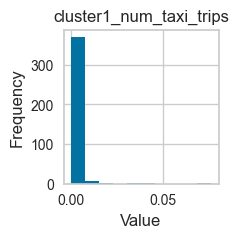

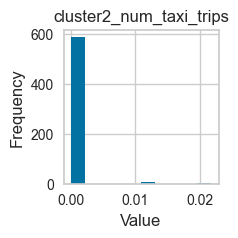

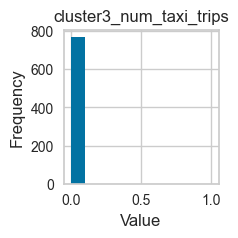

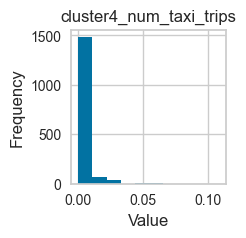

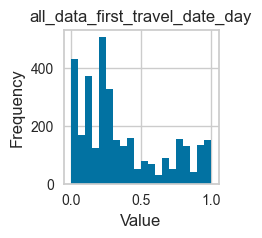

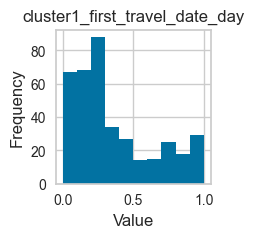

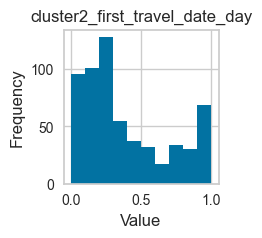

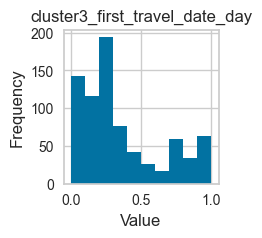

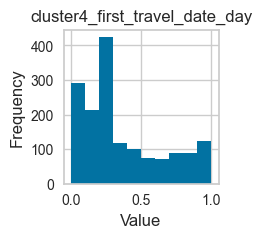

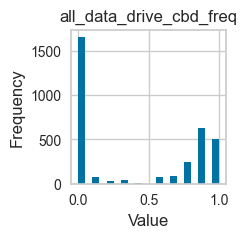

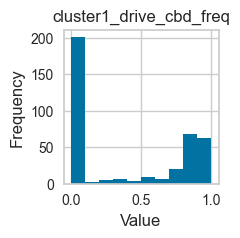

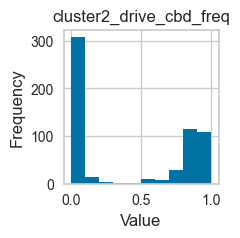

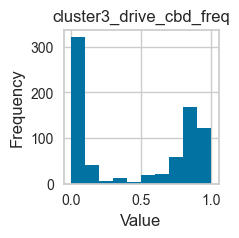

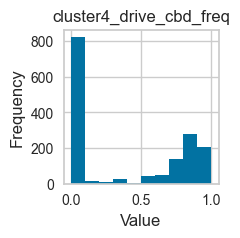

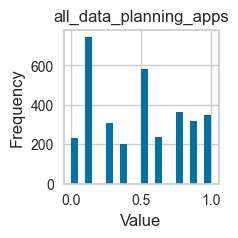

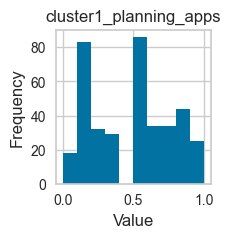

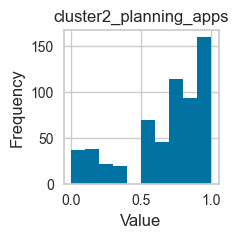

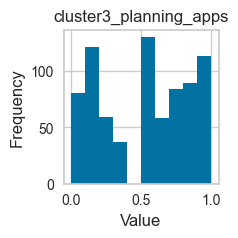

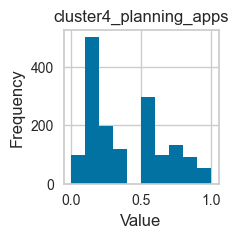

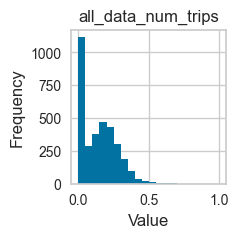

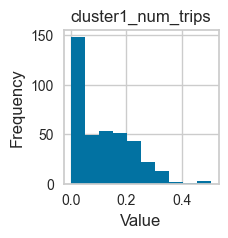

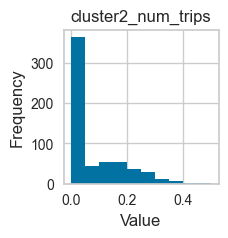

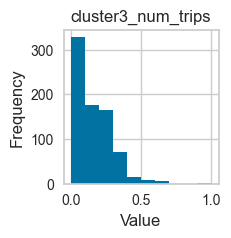

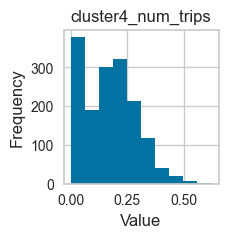

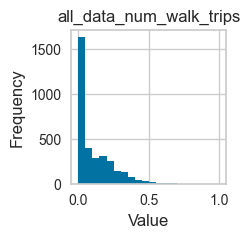

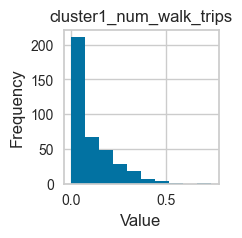

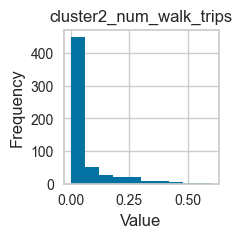

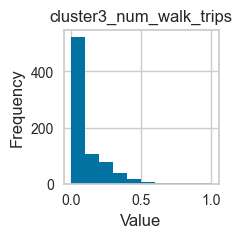

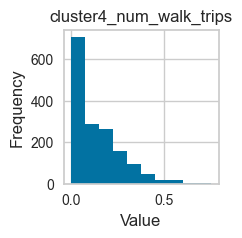

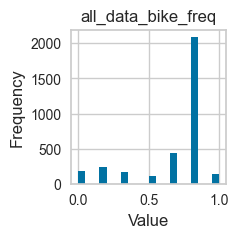

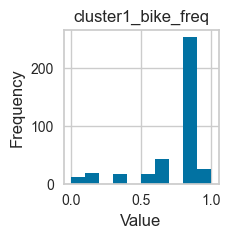

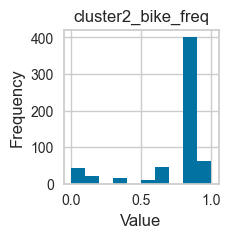

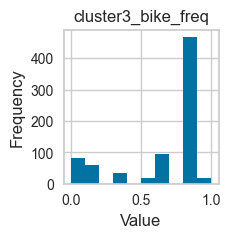

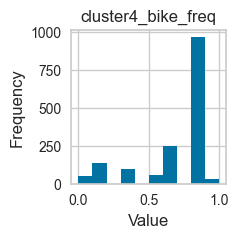

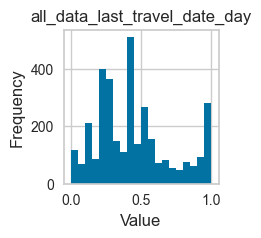

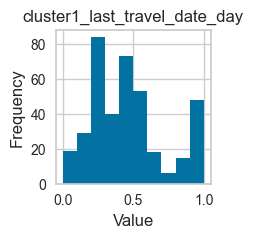

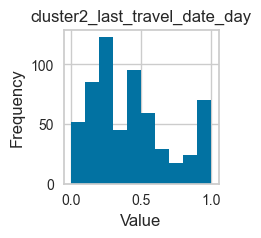

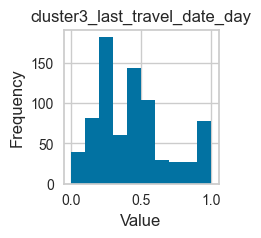

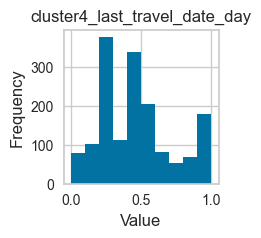

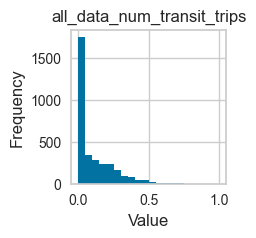

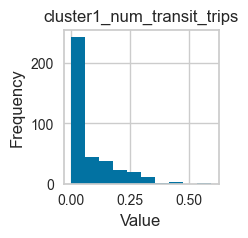

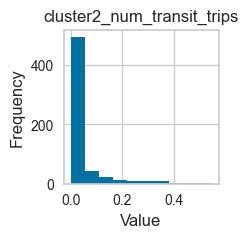

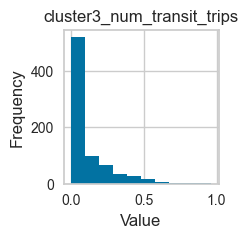

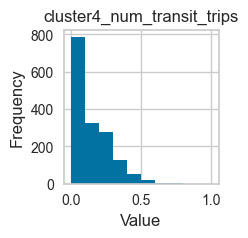

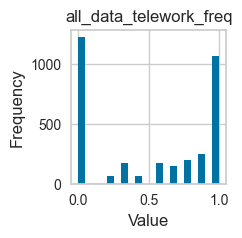

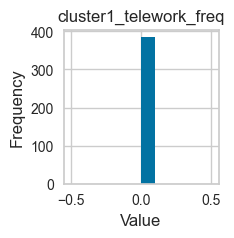

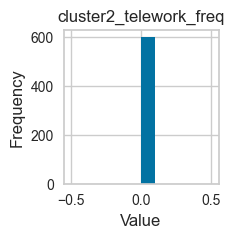

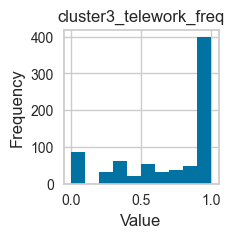

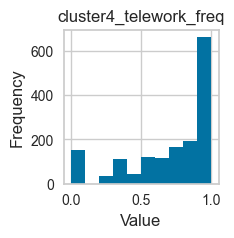

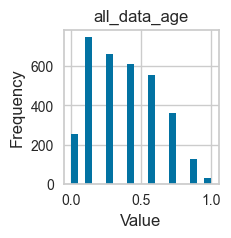

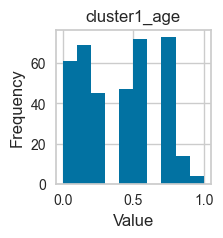

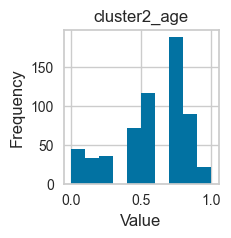

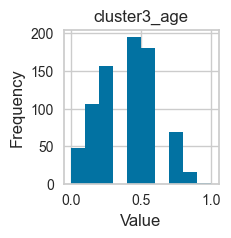

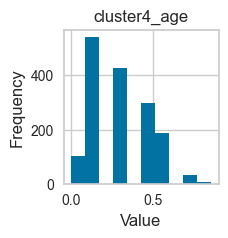

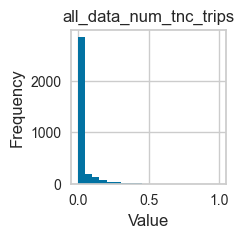

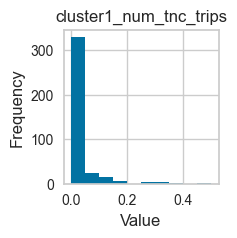

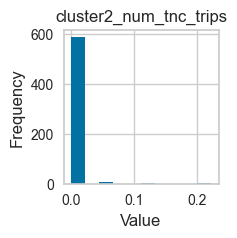

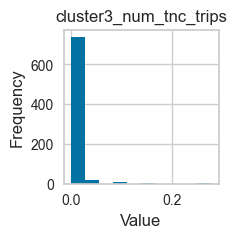

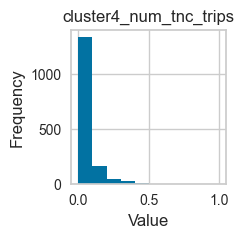

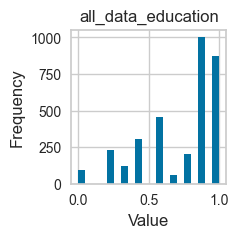

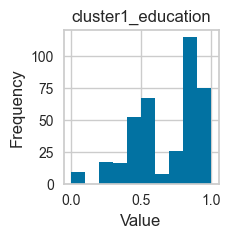

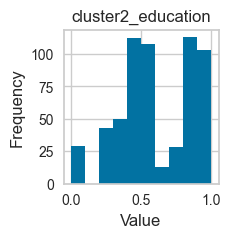

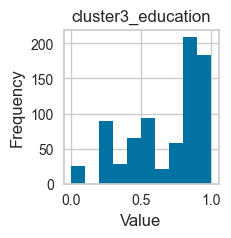

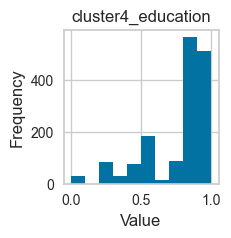

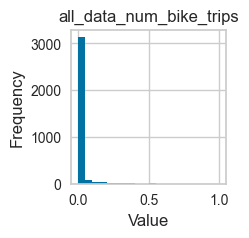

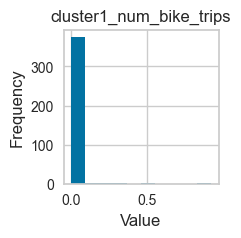

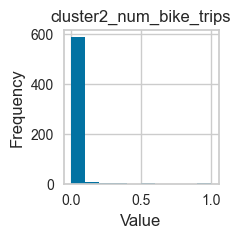

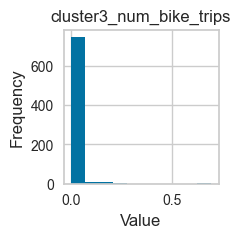

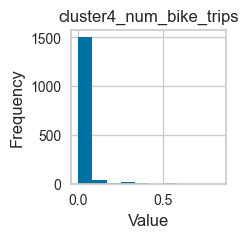

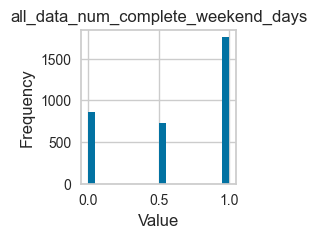

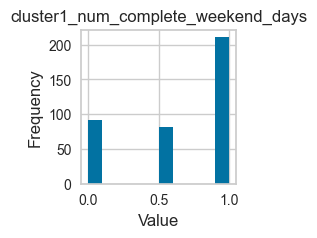

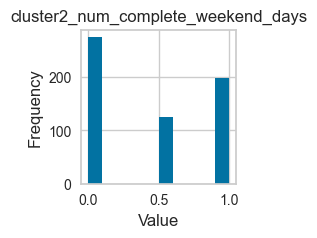

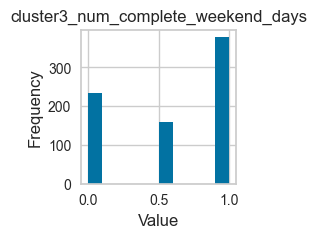

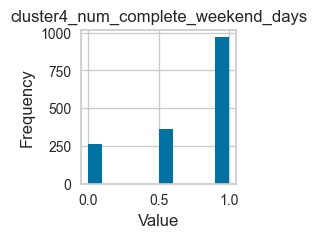

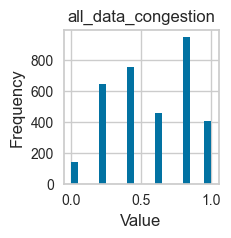

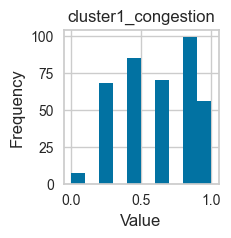

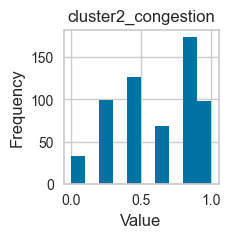

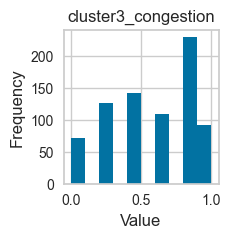

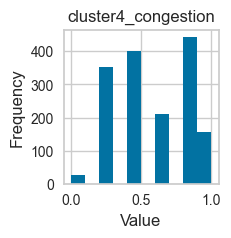

In [11]:
# plot histogram to make decision about related features 
for column in numeric:
    IN.plot_hist(clusters, column)

### For Binary Features

In [12]:
# calculate the percentages of zeros and ones for all features for all cluster
data_binary = IN.calculate_percentage(data, binary)
cluster1_binary = IN.calculate_percentage(cluster1, binary)
cluster2_binary = IN.calculate_percentage(cluster2, binary)
cluster3_binary = IN.calculate_percentage(cluster3, binary)
cluster4_binary = IN.calculate_percentage(cluster4, binary)

In [13]:
# dataframe to concat all percantages dataframes 
all_binary_percentage = pd.DataFrame(columns=binary)

In [14]:
# concat all dataframes in all_binary_percentage
all_binary_percentage.loc['all_data_0'] = data_binary.iloc[0]
all_binary_percentage.loc['cluster1_0'] = cluster1_binary.iloc[0]
all_binary_percentage.loc['cluster2_0'] = cluster2_binary.iloc[0]
all_binary_percentage.loc['cluster3_0'] = cluster3_binary.iloc[0]
all_binary_percentage.loc['cluster4_0'] = cluster4_binary.iloc[0]
all_binary_percentage.loc['all_data_1'] = data_binary.iloc[1]
all_binary_percentage.loc['cluster1_1'] = cluster1_binary.iloc[1]
all_binary_percentage.loc['cluster2_1'] = cluster2_binary.iloc[1]
all_binary_percentage.loc['cluster3_1'] = cluster3_binary.iloc[1]
all_binary_percentage.loc['cluster4_1'] = cluster4_binary.iloc[1]

In [15]:
# fill nan with 0
all_binary_percentage.fillna(0.0, inplace=True)

In [16]:
# show dataframe
all_binary_percentage

,made_trips,worker,license,missing_work_location,missing_school_location,bike_stolen,no_bike_nyc_bike_lanes,no_bike_nyc_paving,no_bike_nyc_storage,no_bike_nyc_long_trips,no_bike_nyc_showers,no_bike_nyc_modes,no_bike_nyc_unable,no_bike_nyc_other,bike_share_citi_bike,bike_share_jump,bike_share_lime,bike_share_none,bike_share_user,no_bike_share_unfamiliar,no_bike_share_expensive,no_bike_share_neighborhood,no_bike_share_stations,no_bike_share_personal_bike,no_bike_share_docks,no_bike_share_uncomfortable,no_bike_share_other,tnc_use_uber,tnc_use_lyft,tnc_use_via,tnc_use_juno,tnc_use_none,tnc_user,car_share_zipcar,car_share_car2go,car_share_enterprise,car_share_other,car_share_none,car_share_user,race_american_indian,race_asian,race_black,race_native_hawaiian,race_white,race_other,disability_hearing,disability_seeing,disability_walking,disability_mobility,disability_dressing,disability_concentrating,disability_none,license999,license995,license-9998,tnc_user999,tnc_user995,tnc_user-9998,tnc_use_999,tnc_use_995,tnc_use_-9998,bike_999,bike_995,bike_-9998,no_bike_nyc_999,no_bike_nyc_995,no_bike_nyc_-9998,bike_share_999,bike_share_995,bike_share_-9998,disability_999,disability_995,disability_-9998,race_999,race_995,race_-9998,no_bike_share_999,no_bike_share_995,no_bike_share_-9998,car_share_999,car_share_995,car_share_-9998,student_0,student_1,student_2,ethnicity_1,ethnicity_2,ethnicity_3,ethnicity_4,ethnicity_997,ethnicity_999,gender_1,gender_2,gender_4,gender_997,gender_999,tnc_purpose_1,tnc_purpose_2,tnc_purpose_3,tnc_purpose_4,tnc_purpose_5,tnc_purpose_7,tnc_purpose_50,tnc_purpose_51,tnc_purpose_60,tnc_purpose_99,tnc_purpose_995,smartphone_type_0,smartphone_type_1,smartphone_type_2,smartphone_type_3,packages_-9998,packages_1,packages_2,packages_3,packages_4,packages_5,packages_6,packages_7,packages_8,harassment_-9998,harassment_1,harassment_2,harassment_3,harassment_4,tnc_mode_1,tnc_mode_5,tnc_mode_100,tnc_mode_101,tnc_mode_102,tnc_mode_103,tnc_mode_104,tnc_mode_105,tnc_mode_106,tnc_mode_107,tnc_mode_995,employment_1,employment_2,employment_3,employment_6,employment_7,work_mode_1,work_mode_5,work_mode_100,work_mode_101,work_mode_102,work_mode_103,work_mode_104,work_mode_105,work_mode_106,work_mode_995,vehicle_1,vehicle_2,vehicle_3,vehicle_4,vehicle_5,vehicle_7,vehicle_18,vehicle_995,vehicle_996,vehicle_997,job_type_-9998,job_type_1,job_type_2,job_type_3,job_type_4,job_type_995,industry_-9998,industry_1,industry_2,industry_3,industry_4,industry_5,industry_6,industry_7,industry_8,industry_9,industry_10,industry_11,industry_12,industry_13,industry_14,industry_15,industry_16,industry_17,industry_18,industry_995,cms_zone_Inner Brooklyn,cms_zone_Inner Queens,cms_zone_Manhattan Core,cms_zone_Middle Queens,cms_zone_Northern Bronx,cms_zone_Northern Manhattan,cms_zone_Outer Brooklyn,cms_zone_Outer Queens,cms_zone_Southern Bronx,cms_zone_Staten Island,work_cms_zone_Inner Brooklyn,work_cms_zone_Inner Queens,work_cms_zone_JFK,work_cms_zone_LGA,work_cms_zone_Manhattan Core,work_cms_zone_Middle Queens,work_cms_zone_Northern Bronx,work_cms_zone_Outer Brooklyn,work_cms_zone_Outer Queens,work_cms_zone_Southern Bronx,work_cms_zone_Staten Island,work_cms_zone_Upper Manhattan,first_travel_date_month,last_travel_date_month
all_data_0,9.234907,29.408249,23.939032,93.962941,93.514644,94.620442,84.757920,88.045427,88.822475,87.627017,94.799761,74.775852,94.471010,86.580992,87.178721,99.103407,98.565451,19.814704,85.714286,94.949193,90.824866,79.647340,94.052600,85.475194,98.475792,71.727436,83.592349,50.268978,66.258219,93.245666,93.604304,61.775254,40.974298,94.351464,97.728631,98.894202,94.739988,15.600717,87.118948,98.326360,85.385535,81.918709,99.193066,51.404662,91.063957,97.638972,98.983861,93.036461,98.356246,99.073521,97.489540,16.796175,100.0,100.0,95.875672,100.0,100.0,97.250448,100.0,100.0,97.250448,100.0,100.0,94.471010,100.0,62.432756,100.0,100.0,100.0,100.0,93.992827,100.0,100.0,88.792588,100.0,100.0,100.0,97.369994,82.815302,100.0,100.0,97.280

####  We can choose the features from this dataframe when there is high variance  in zeros and ones percentages over all the clusters

### Get the original data before the scaling 

In [17]:
# load data without scaling
original= pd.read_csv("../data/processed/data_transformed.csv")

In [18]:
# filter the dataset with cluster label and create dataset for each cluster
cluster1_ = original[data['hierarchical_cluster']==1]
cluster2_ = original[data['hierarchical_cluster']==2]
cluster3_ = original[data['hierarchical_cluster']==3]
cluster4_ = original[data['hierarchical_cluster']==4]

In [19]:
# all clusters in list 
clusters_ = [original, cluster1_ ,cluster2_, cluster3_, cluster4_]

In [20]:
# list of related numeric features extracted manualy
related_numeric_features = ['num_complete_weekdays','age', 'jobs_count', 'planning_apps', 'tnc_freq', 'telework_freq']

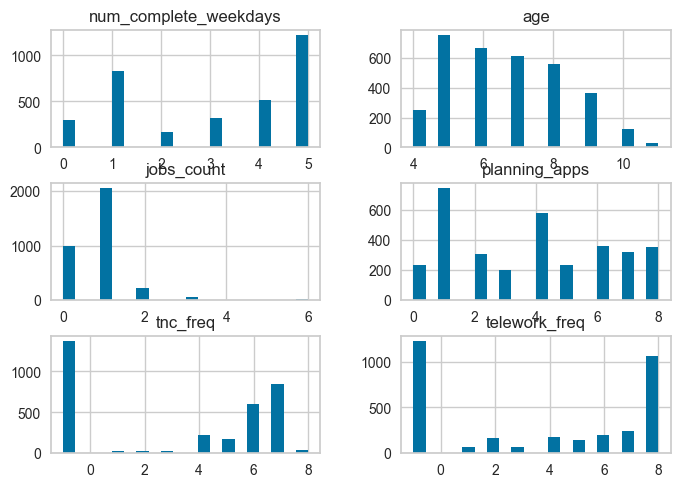

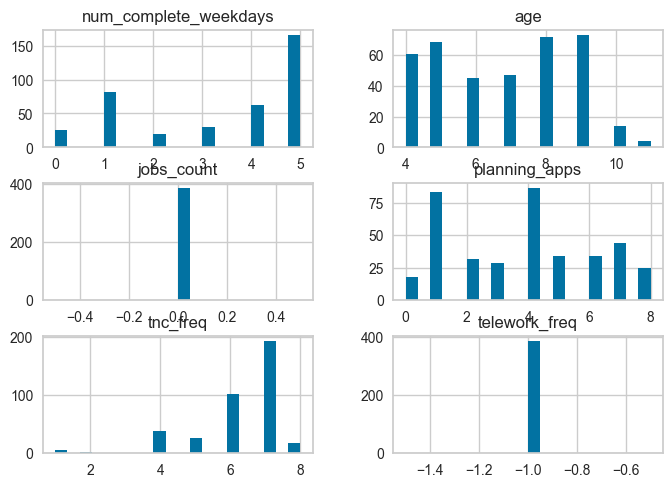

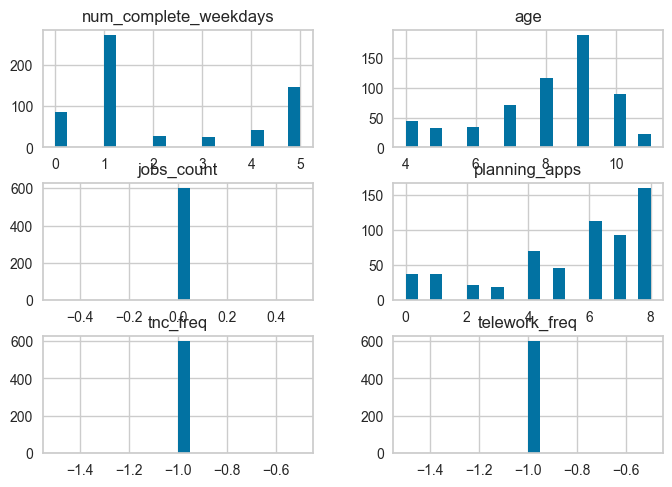

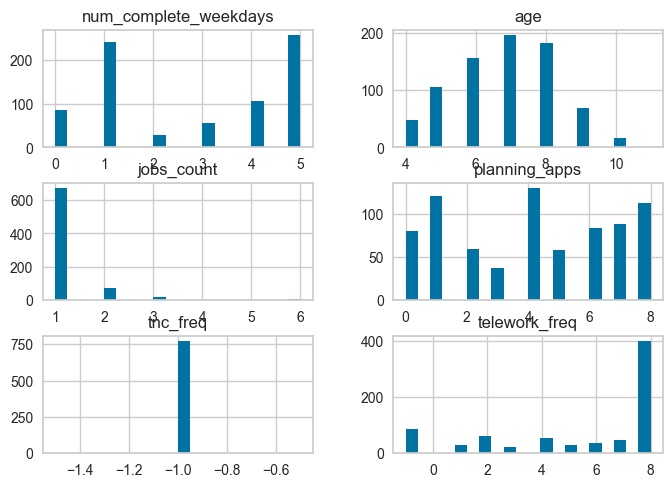

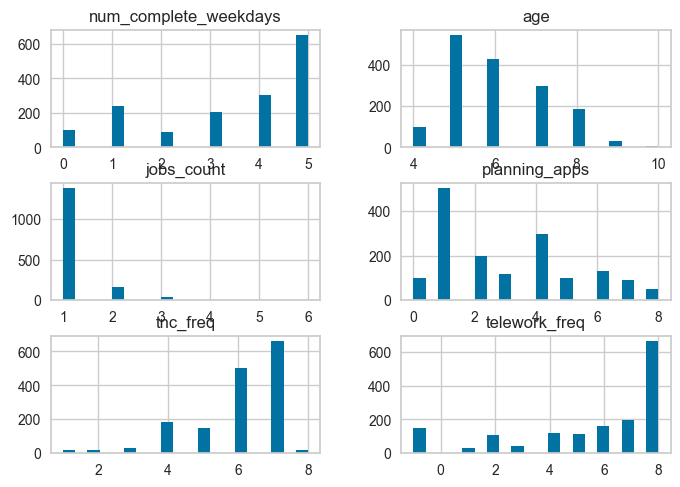

In [21]:
# plot distribution for related columns for each cluster 
for cluster in clusters_:
    cluster[related_numeric_features].hist(bins =20)


#### From these plots we can know values for each feature within the cluster to simplify interpretation